In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
dataset=pd.read_csv(r"C:\Users\Admin\Downloads\diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness', 'Insulin',
       'BMI']

for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]

In [51]:
from sklearn.impute import SimpleImputer

# Initialize imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=0, test_size=0.2)

# Scale the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Initialize and fit the classifier
classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
 
print("Accuracy Score:", accuracy)




F1 Score: 0.6888888888888888
Confusion Matrix:
[[95 12]
 [16 31]]
Accuracy Score: 0.8181818181818182


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Split the data into training and test sets (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=0, test_size=0.2)

# Scale the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Initialize and fit the Logistic Regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", classification_rep)
print("Accuracy Score:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

Accuracy Score: 0.8116883116883117
F1 Score: 0.6588235294117647
Confusion Matrix:
[[97 10]
 [19 28]]


In [ ]:
import math
math.sqrt(len(y_test)) ## for n=11 should be odd

12.409673645990857

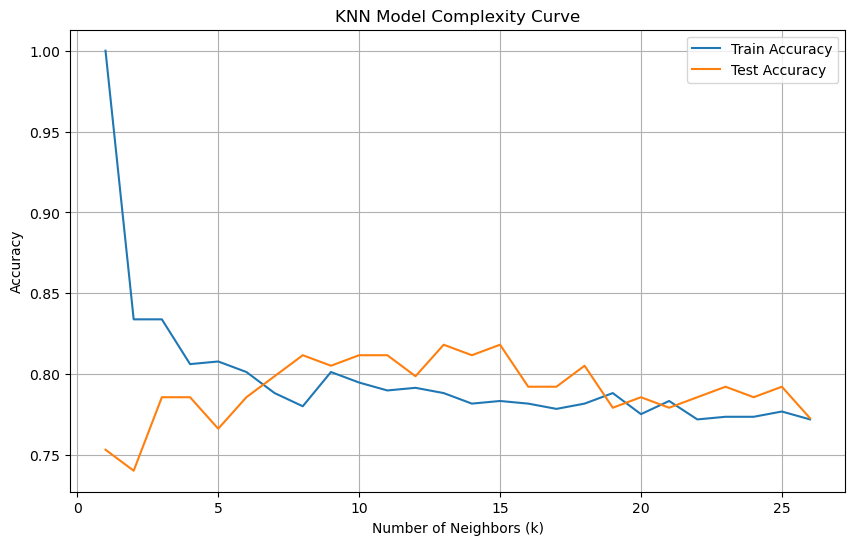

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you already have X and y
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=0, test_size=0.2)

# Scale the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop over a range of neighbors from 1 to 26
for n_neighbors in range(1, 27):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, p=2, metric='euclidean')
    classifier.fit(X_train, y_train)
    
    # Calculate accuracy on the training set
    y_train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate accuracy on the test set
    y_test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the model complexity curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 27), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 27), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Model Complexity Curve')
plt.legend()
plt.grid(True)
plt.show()
